In [191]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [199]:
def get_clean_paths(user, fork_or_spoon= 'fork'):
    parent_path = "clean_data/" + user + '/' + fork_or_spoon
    #dir_list = os.listdir(parent_path)
    EMG_eating_txt_path = parent_path + "/" + "eating_EMG.txt"
    EMG_not_eating_txt_path = parent_path + "/" + "not_eating_EMG.txt"
    IMU_eating_txt_path = parent_path + "/" + "eating_IMU.txt"
    IMU_not_eating_txt_path = parent_path + "/" + "not_eating_IMU.txt"
    master_EMG_path = parent_path + "/" + "master_dfEMG.txt"
    master_IMU_path = parent_path + "/" + "master_dfIMU.txt"
    return (master_EMG_path, EMG_eating_txt_path, EMG_not_eating_txt_path, master_IMU_path, IMU_eating_txt_path, IMU_not_eating_txt_path)

def get_clean_df(user = "user10", data_for="EMG", fork_or_spoon="fork", eating=True, master=False):
    paths = get_clean_paths(user, fork_or_spoon)
    if data_for == "EMG":
        if master:
            return pd.read_csv(paths[0], sep=",", index_col=0)
        elif eating:
            return pd.read_csv(paths[1], sep=",", index_col=0)
        else:
            return pd.read_csv(paths[2], sep=",", index_col=0)

    elif( data_for == "IMU"):
        if master:
            return pd.read_csv(paths[3], sep=",", index_col=0)
        elif eating:
            return pd.read_csv(paths[4], sep=",", index_col=0)
        else:
            return pd.read_csv(paths[5], sep=",", index_col=0)
    

In [215]:
df1 = get_clean_df(eating=True)
df2 = get_clean_df(eating=False)
df1_IMU = get_clean_df(data_for="IMU",eating=True)
df2_IMU = get_clean_df(data_for="IMU",eating=False)

# RMS

In [232]:
# (df1.iloc[:,1:9]**2).sum(1).pow(1/2) # sum(1) sums the rows, sum(0) sums the columns
# (df1.iloc[:,1:9]**2).sum(1).pow(1/2)
def RMS_feature_extraction(df1,df2):
    try:
        ax = (((df1.iloc[:,1:-1]**2).sum(0))/df1.shape[0]).pow(1/2).plot(label='eating',legend=True)
        ((df2.iloc[:,1:-1]**2).sum(0)/df2.shape[0]).pow(1/2).plot(ax=ax,label='not eating',legend=True, title="user10")
        plt.xticks(rotation=70)
        plt.show()
    except:
        print("error in RMS_feature_extraction()")

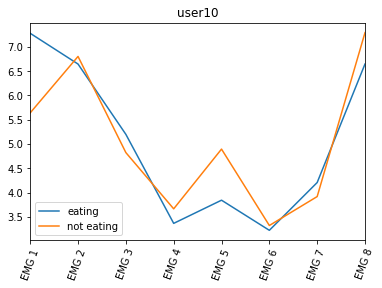

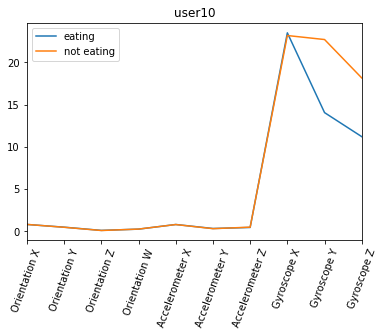

In [233]:
RMS_feature_extraction(df1,df2)
RMS_feature_extraction(df1_IMU,df2_IMU)

# avg

In [234]:
def AVG_feature_extraction(df1,df2):
    try:
        ax = (((df1.iloc[:,1:-1]).sum(0))/df1.shape[0]).plot(label='eating',legend=True)
        ((df2.iloc[:,1:-1]).sum(0)/df2.shape[0]).plot(ax=ax,label='not eating',legend=True, title="user10")
        plt.xticks(rotation=70)
        plt.show()
    except:
        print("error in AVG_feature_extraction()")

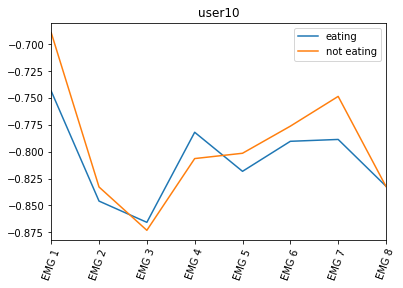

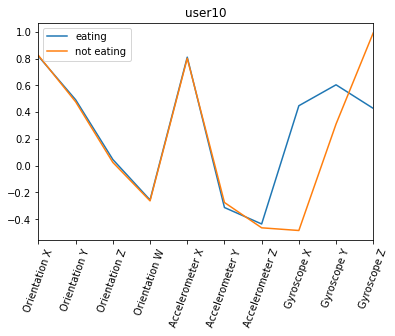

In [236]:
AVG_feature_extraction(df1,df2)
AVG_feature_extraction(df1_IMU,df2_IMU)

# max

In [250]:
def MAX_feature_extraction(df1,df2):
    try:
        ax = ((df1.iloc[:,1:-1]).abs().max(0)).plot(label='eating',legend=True)
        ((df2.iloc[:,1:-1]).abs().max(0)).plot(ax=ax,label='not eating',legend=True, title="user10")
        plt.xticks(rotation=70)
        plt.show()
    except:
        print("error in AVG_feature_extraction()")

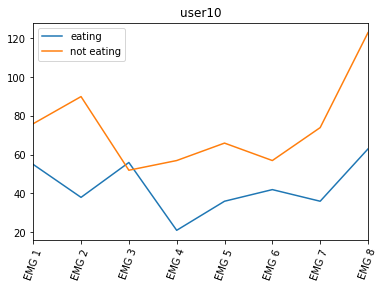

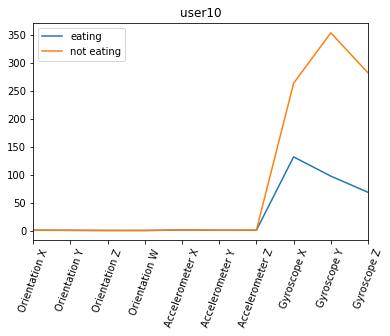

In [252]:
MAX_feature_extraction(df1,df2)
MAX_feature_extraction(df1_IMU,df2_IMU)

# std

In [265]:
def STD_feature_extraction(df1,df2):
    try:
        ax = ((df1.iloc[:,1:-1]).std(0)).plot(label='eating',legend=True)
        ((df2.iloc[:,1:-1]).std(0)).plot(ax=ax,label='not eating',legend=True, title="user10")
        plt.xticks(rotation=70)
        plt.show()
    except:
        print("error in AVG_feature_extraction()")

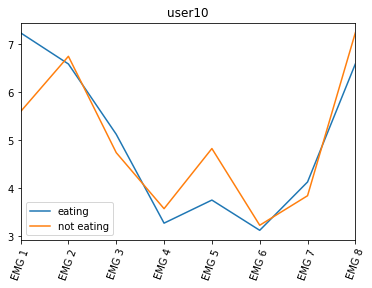

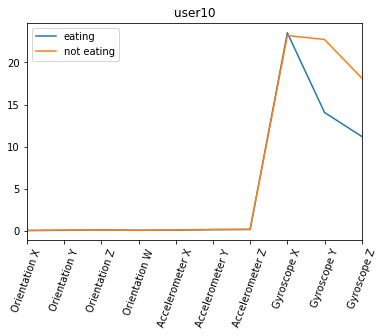

In [266]:
STD_feature_extraction(df1,df2)
STD_feature_extraction(df1_IMU,df2_IMU)

# FFT

In [ ]:
from scipy import fftpack
f_s_EMG = 50
f_s_IMU = 200

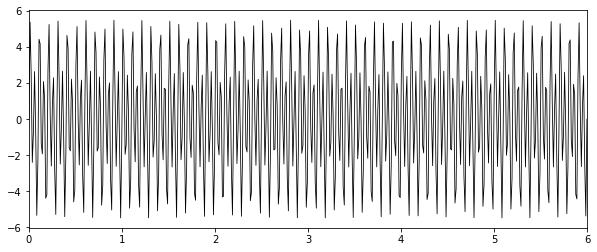

In [98]:
# sampling freq in herts 20Hz, and 40Hz
freq_sampling1 = 10
freq_sampling2 = 20
amplitude1 = 2 # amplitude of first sine wave
amplitude2 = 4 # amplitude of second sine wave
time = np.linspace(0, 6, 500, endpoint=True) # time range with total samples of 500 from 0 to 6 with time interval equals 6/500
#y = amplitude1*np.sin(2*np.pi*freq_sampling1*time) + amplitude2*np.sin(2*np.pi*freq_sampling2*time)

plt.figure(figsize=(10, 4))
plt.plot(time,y, 'k', lw=0.8)
plt.xlim(0,6)
plt.show()

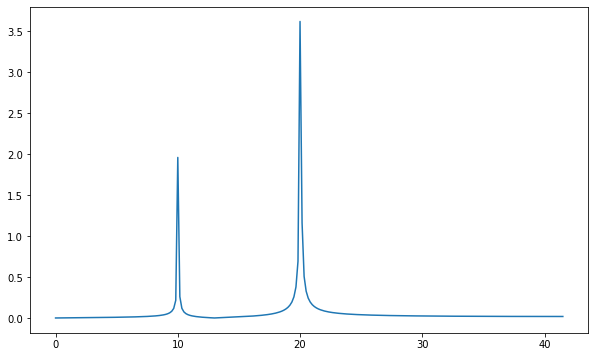

In [99]:
# apply fft function
# yf = fftpack.fft(y, time.size)

# amp = np.abs(yf) # get amplitude spectrum 
# freq = np.linspace(0.0, 1.0/(2.0*(6/500)), time.size//2) # get freq axis

# # plot the amp spectrum

# plt.figure(figsize=(10,6))
# plt.plot(freq, (2/amp.size)*amp[0:amp.size//2])
# plt.show()


yf = fftpack.fft(y, time.size)
amp = np.abs(yf) # get amplitude spectrum 
freq = fftpack.fftfreq(time.size, 6/500)
plt.figure(figsize=(10,6))
plt.plot(freq[0:freq.size//2], (2/amp.size)*amp[0:amp.size//2])
plt.show()

In [ ]:
np.average(diff_array),np.average(diff_EMG),np.average(diff_IMU)

In [ ]:
IMU_col = ['UNIX time stamp', 'Orientation X', 'Orientation Y', 'Orientation Z', 'Orientation W', 'Accelerometer X', 'Accelerometer Y', 'Accelerometer Z', 'Gyroscope X', 'Gyroscope Y','Gyroscope Z'] 
for col in IMU_col:
    if col == IMU_col[0]:
        continue
    df_IMU.plot(x=IMU_col[0],y=col)

In [ ]:
EMG_col = ['UNIX time stamp', 'EMG 1', 'EMG 2', 'EMG 3', 'EMG 4', 'EMG 5', 'EMG 6', 'EMG 7', 'EMG 8']
for col in EMG_col:
    if col == EMG_col[0]:
        continue
    df_EMG.plot(x=EMG_col[0],y=col)